In [1]:
import xarray as xr

import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
from scipy import stats

import math

# font size for plots
SMALL_SIZE = 8
BIGGER_SIZE = 12
plt.rc('font', size=  BIGGER_SIZE)
plt.rc('axes', titlesize=BIGGER_SIZE)
plt.rcParams["font.family"] = "serif"


#=================================================================================

ymin =   0.
ymax =  80.
var = 'curv'
ylabel = "Curvature Acceleration"




ymin =   0.
ymax =  80.
#speed
var = 'speed'
ylabel = "Translation Speed"


ymin = -80.
ymax =  80.
var = 'tang'
ylabel = "Tangential Acceleration"


#=================================================================================




#=================================================================================

#=================================================================================


# for all 
mon = '_ALL_'
monTitle = '[All Months]'
dom = '0_90'
titleString1 = '(a) Entire Atlantic ' + monTitle 
titleString2 = '(b) Entire Atlantic ' + monTitle 


# for JASO
mon = '_JASO_'
monTitle = '[July-October]'
dom = '20_50'
titleString1 = '(c) Atlantic: 20-50N ' + monTitle
titleString2 = '(d) Atlantic: 20-50N ' + monTitle



#for AS
mon = '_AS_'
monTitle = '[August-September]'
dom = '20_50'
titleString1 = '(e) Atlantic: 20-50N ' + monTitle
titleString2 = '(f) Atlantic: 20-50N ' + monTitle


#=================================================================================
fileName = "res/" + var+mon + dom+".nc"
output1 = "scatter_" + var+ mon +dom+".png"
output2 = "beta_" + var+ mon +dom+".png"
xlabelString = "Quantiles of Conditional " + ylabel
npfileName = "np_" + var+ mon +dom+".txt"

print(fileName)

res/tang_AS_20_50.nc


In [2]:
#open the data set
ds = xr.open_dataset(fileName)
print(ds)

<xarray.Dataset>
Dimensions:    (ncl0: 1, ncl1: 1, ncl2: 1, ncl3: 1, ncl5: 15206, ncl6: 15206, ncl7: 54, ncl8: 54, storm: 15206)
Dimensions without coordinates: ncl0, ncl1, ncl2, ncl3, ncl5, ncl6, ncl7, ncl8, storm
Data variables:
    startYear  (ncl0) int32 ...
    endYear    (ncl1) int32 ...
    latS       (ncl2) float32 ...
    latN       (ncl3) float32 ...
    Dates      (storm) datetime64[ns] ...
    Data       (ncl5) float64 ...
    Fracyear   (ncl6) float32 ...
    years      (ncl7) float32 ...
    yearly     (ncl8) float64 ...


In [3]:
print(ds.latS)
print(ds.latN)

<xarray.DataArray 'latS' (ncl2: 1)>
array([20.], dtype=float32)
Dimensions without coordinates: ncl2
<xarray.DataArray 'latN' (ncl3: 1)>
array([50.], dtype=float32)
Dimensions without coordinates: ncl3


Trend using annual mean values [one average value per year]
===============================

In [4]:
# now lets read the yearly averaged data and establish some basic trend using OLS = this is the trend of the mean
#
yData  = ds.yearly
years  = ds.years
dfA = pd.DataFrame({'years':years, 'yData':yData, 'const':1})
reg1 = sm.OLS(endog=dfA['yData'], exog=dfA[['const', 'years']],missing='drop')
results = reg1.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  yData   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.019
Method:                 Least Squares   F-statistic:                  0.004075
Date:                Sun, 20 Dec 2020   Prob (F-statistic):              0.949
Time:                        23:31:55   Log-Likelihood:                -103.24
No. Observations:                  54   AIC:                             210.5
Df Residuals:                      52   BIC:                             214.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1094     29.026      0.038      0.9

const    1.109406
years    0.000930
dtype: float64
percent change =  <xarray.DataArray 'years' ()>
array(1.67776133)


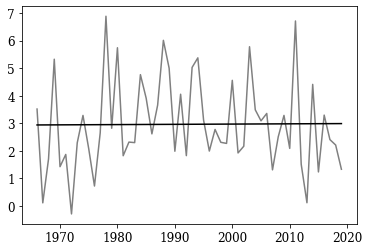

In [5]:
print (results.params)
intercept = results.params['const']
slope     =  results.params['years']
predic = intercept + slope*years

plt.plot(years, yData, color='grey',markersize=1)
plt.plot(years, predic, color='black',markersize=1)
pChange = 100.*(predic[-1]-predic[0])/abs(predic[0])
print ("percent change = ", pChange)

Now We use each track point along with its date (in fractional year)
====================================================================


Linear regression using numpy
================

R-squared : 0.000003
slope    : 0.002269
p value  : 0.828419
intercept  : -1.618111
percent change =  <xarray.DataArray 'years' ()>
array(1.67776133)


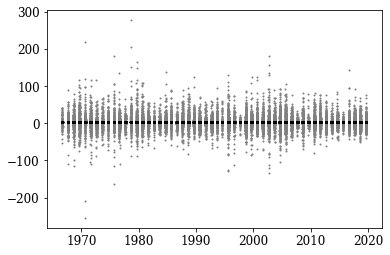

In [6]:
# Linear regression using numpy with fractional year


Data  = ds.Data
Time  = ds.Fracyear
slope, intercept, r_value, p_value, std_err = stats.linregress(Time.values,Data.values)
print("R-squared : %f" % r_value**2)
print ("slope    : %f" % slope)
print ("p value  : %f" % p_value)
print ("intercept  : %f" % intercept)
pChange = 100.*(predic[-1]-predic[0])/predic[0]
print ("percent change = ", pChange)

predic = intercept + slope*Time.values
plt.plot(Time, Data,'o', color='grey',markersize=1)
plt.plot(Time,predic,'o', color='black',markersize=1)


In [7]:
# the time is in fractional year. What if we just assign all values to an integer year index?
#
xdat = [math.floor(float(i)) for i in Time.values]
slope, intercept, r_value, p_value, std_err = stats.linregress(xdat,Data.values)
print("R-squared : %f" % r_value**2)
print ("slope    : %f" % slope)
print ("p value  : %f" % p_value)
print ("intercept  : %f" % intercept)
#notes: the difference between the previous cell and this is small



R-squared : 0.000003
slope    : 0.002195
p value  : 0.833940
intercept  : -1.469256


Convert to Pandas DF
====================

In [8]:
#
# use the time and data to create a pandas dataframe

df = pd.DataFrame({'Time':Time, 'Data':Data})

#standardize the acceleration values
#df.iloc[:,1:2] = df.iloc[:,1:2].apply(lambda x: (x-x.mean())/ x.std()
#stddev = df.iloc[:,1].std()
#print(stddev)
#df.iloc[:,1] = (df.iloc[:,1]-df.iloc[:,1].mean())/df.iloc[:,1].std()
# we could convert fractional year to just year by using the xdat that was created using the floor function
# i.e. all points in a year (e.g. 2001) will be assigned the time = 2001.
#df = pd.DataFrame({'Time':xdat, 'Data':Data})

# Notes: I tested the outcome of keeping the fractional year versus the integer year (floor). The differences were minute
# so, either should be fine

#print(df.iloc[:,1].mean())
#print(df.iloc[:,1].std())



A frst order polynomial fit to get the linear regression of the mean
=========================

In [9]:
# A frst order polynomial fit to get the linear regression
poly = smf.ols(formula='Data ~ 1 +  Time', data=df).fit()
print (poly.summary())

#print(dir(poly))
intercept = poly.params['Intercept']
slope =  poly.params['Time']
predic = intercept + slope*Time
pChange = 100.*(predic[-1]-predic[0])/abs(predic[0])
print ("percent change = ", pChange)



                            OLS Regression Results                            
Dep. Variable:                   Data   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.04697
Date:                Sun, 20 Dec 2020   Prob (F-statistic):              0.828
Time:                        23:31:55   Log-Likelihood:                -67467.
No. Observations:               15206   AIC:                         1.349e+05
Df Residuals:                   15204   BIC:                         1.350e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.6181     20.874     -0.078      0.9

Now we proceed to Quantile Regression
======================================

In [10]:
mod = smf.quantreg('Data ~ Time', df)
result = mod.fit(q=.50)
print(result.summary())
#print (dir(res))

print(result.pvalues['Time'])
print(result.params['Time'])

                         QuantReg Regression Results                          
Dep. Variable:                   Data   Pseudo R-squared:            0.0001246
Model:                       QuantReg   Bandwidth:                       2.536
Method:                 Least Squares   Sparsity:                        27.19
Date:                Sun, 20 Dec 2020   No. Observations:                15206
Time:                        23:31:55   Df Residuals:                    15204
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -26.5376     13.877     -1.912      0.056     -53.738       0.663
Time           0.0140      0.007      2.008      0.045       0.000       0.028

The condition number is large, 2.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.


In [11]:
#quantiles = np.arange(.05,.96, .05)

quantiles = [0.05,.10,.15,.2,.3,.5,.7,.8,.85,.90,.95]


def fit_model(q):
    res = mod.fit(q=q)
    return [q, res.params['Intercept'],res.params['Time'], res.pvalues['Time']] + \
            res.conf_int().loc['Time'].tolist()
   
        
models = [fit_model(x1) for x1 in quantiles]
models = pd.DataFrame(models, columns=['q', 'a', 'b', 'p', 'lb', 'ub'])

x = np.arange(1966,2021,1)
get_y = lambda a, b: a + b * x

n = len(quantiles)
print(n)

pc = [0.]*n
for i in range(models.shape[0]):
    y = get_y(models.a[i], models.b[i])
    perChange = 100.*(y[-1]-y[0])/abs(y[0])
    pc[i] = math.floor(perChange)
    print( models.q[i], y[-1], y[0],pc[i])
    
# add the percent change as a new column    
models['pc'] = pc   
    
print(models.round(4))

print(pc)



np.savetxt(npfileName, models[["q","b","pc","p","lb","ub"]], fmt='%1.2f & %1.2f & %3.0f & %1.2f &  [ %1.2f, %1.2f ] \\')


11
0.05 -21.996676721388894 -29.668778153943663 25
0.1 -15.514761591416232 -19.170050539870942 19
0.15 -11.979401945388759 -12.71363859670629 5
0.2 -8.902138231303695 -9.15265970895203 2
0.3 -4.457145241097038 -4.765321416869412 6
0.5 1.6896071021323706 0.9350189963883153 80
0.7 8.432433794186636 8.2591225459621 2
0.8 13.650058492007645 14.278561057123653 -5
0.85 17.162392834327306 19.10770623533773 -11
0.9 22.75267541101772 26.519540108217342 -15
0.95 31.51605290459304 40.79056330437305 -23
       q         a       b       p      lb      ub  pc
0   0.05 -308.9901  0.1421  0.0000  0.0865  0.1976  25
1   0.10 -152.2496  0.0677  0.0001  0.0333  0.1021  19
2   0.15  -39.4453  0.0136  0.3529 -0.0151  0.0423   5
3   0.20  -18.2735  0.0046  0.6978 -0.0188  0.0281   2
4   0.30  -15.9852  0.0057  0.5283 -0.0120  0.0234   6
5   0.50  -26.5376  0.0140  0.0447  0.0003  0.0276  80
6   0.70    1.9493  0.0032  0.7487 -0.0164  0.0228   2
7   0.80   37.1607 -0.0116  0.4040 -0.0390  0.0157  -5
8   0.85

In [12]:
quantiles = np.arange(.05,.96, .05)

#quantiles = [0.05,.10,.15,.2,.5,.7,.8,.85,.90,.95]


def fit_model(q):
    res = mod.fit(q=q)
    return [q, res.params['Intercept'],res.params['Time'], res.pvalues['Time']] + \
            res.conf_int().loc['Time'].tolist()
   
        
models = [fit_model(x1) for x1 in quantiles]
models = pd.DataFrame(models, columns=['q', 'a', 'b', 'p', 'lb', 'ub'])

print(models.round(4))






       q         a       b       p      lb      ub
0   0.05 -308.9901  0.1421  0.0000  0.0865  0.1976
1   0.10 -152.2496  0.0677  0.0001  0.0333  0.1021
2   0.15  -39.4453  0.0136  0.3529 -0.0151  0.0423
3   0.20  -18.2735  0.0046  0.6978 -0.0188  0.0281
4   0.25   -8.3242  0.0009  0.9220 -0.0172  0.0190
5   0.30  -15.9852  0.0057  0.5283 -0.0120  0.0234
6   0.35  -25.2695  0.0113  0.2181 -0.0067  0.0293
7   0.40  -21.8632  0.0106  0.1086 -0.0023  0.0234
8   0.45   -9.0607  0.0046  0.4754 -0.0080  0.0171
9   0.50  -26.5376  0.0140  0.0447  0.0003  0.0276
10  0.55  -28.9644  0.0160  0.0539 -0.0003  0.0324
11  0.60  -17.2447  0.0110  0.1845 -0.0052  0.0271
12  0.65  -18.5216  0.0125  0.1567 -0.0048  0.0297
13  0.70    1.9493  0.0032  0.7487 -0.0164  0.0228
14  0.75   21.3703 -0.0053  0.6545 -0.0287  0.0181
15  0.80   37.1607 -0.0116  0.4040 -0.0390  0.0157
16  0.85   89.9315 -0.0360  0.0489 -0.0719 -0.0002
17  0.90  163.6613 -0.0698  0.0038 -0.1170 -0.0225
18  0.95  378.4514 -0.1718  0.0

In [13]:
# Least square estimate of the trend of the mean

ols = smf.ols(formula='Data ~ Time', data=df).fit()
ols_ci = ols.conf_int().loc['Time'].tolist()
ols = dict(a = ols.params['Intercept'],
           b = ols.params['Time'],
           lb = ols_ci[0],
           ub = ols_ci[1],
           p=ols.pvalues['Time'])
print(ols)


{'a': -1.6181110982977929, 'b': 0.00226874386737745, 'lb': -0.018249565089239445, 'ub': 0.022787052823994347, 'p': 0.8284187430069185}


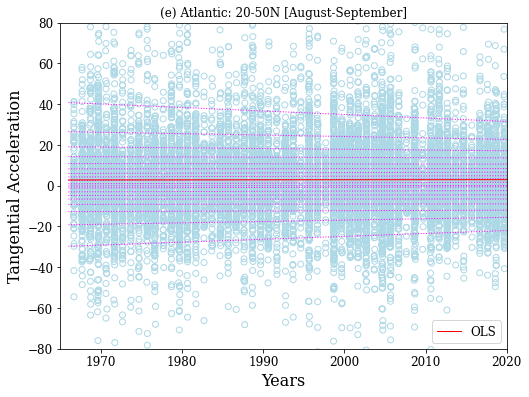

In [14]:
#x = np.arange(df.years.min(), df.years.max(), 50)

x = np.arange(1966,2021,1)
get_y = lambda a, b: a + b * x

n = 9
colors = pl.cm.jet(np.linspace(0,1,n))

fig, ax = plt.subplots(figsize=(8, 6))

for i in range(models.shape[0]):
    y = get_y(models.a[i], models.b[i])
    ax.plot(x, y, linestyle='dotted', linewidth=1, color='magenta')    
    
y = get_y(ols['a'], ols['b'])

ecolor = "lightblue"
ax.scatter(df.Time, df.Data, facecolors='none', edgecolors=ecolor) #, s=2 ,alpha=.7)
ax.plot(x, y, color='red', linewidth=1, label='OLS')
ax.set_xlim((1965,2020))
ax.set_ylim((ymin,ymax))
legend = ax.legend()
ax.set_xlabel('Years', fontsize=16)
ax.set_ylabel(ylabel, fontsize=16);
plt.title(titleString1)

plt.savefig(output1)


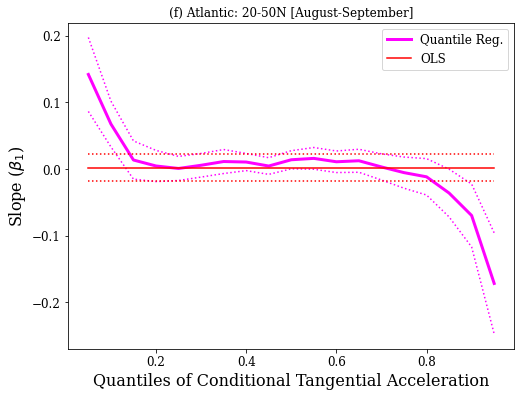

In [15]:
n = models.shape[0]
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(models.q, models.b,     color='magenta', linewidth=3, label='Quantile Reg.')
ax.plot(models.q, models.ub, linestyle='dotted', color='magenta')
ax.plot(models.q, models.lb, linestyle='dotted', color='magenta')

ax.plot(models.q, [ols['b']] * n, color='red', label='OLS')
ax.plot(models.q, [ols['lb']] * n, linestyle='dotted', color='red')
ax.plot(models.q, [ols['ub']] * n, linestyle='dotted', color='red')
legend = ax.legend()
ax.set_xlabel(xlabelString, fontsize=16)
ax.set_ylabel('Slope (' + r'$\beta_1$' +')', fontsize=16);
plt.title(titleString2)

plt.savefig(output2)
